<a href="https://colab.research.google.com/github/Pacey999/Pacey999/blob/main/Yagnic_Working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf


In [ ]:
gold_ticker = 'NVDA'
# Fetch historical data
gold_data = yf.download(gold_ticker, start="1996-01-01", end="2024-04-02")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
gold_data.shape

(6338, 6)

In [ ]:
gold_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-25,939.409973,967.659973,935.099976,950.020020,950.020020,55213600
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700
2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43521200
2024-04-01,902.989990,922.250000,892.039978,903.630005,903.630005,45244100


In [ ]:
# forming strategy
# 1. Buy at open and sell at close
# 2. Sell at Open and buy at close

In [ ]:
gold_data["%change"] = (gold_data['Close'] - gold_data['Open'])/gold_data['Open']

In [ ]:
gold_data.head()

,Open,High,Low,Close,Adj Close,Volume,%change
Date,,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376237,271468800,-0.062501
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415653,51048000,0.023530
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383404,34320000,-0.088067
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382210,24436800,-0.006211
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381015,22752000,-0.003125


In [ ]:
gold_data.loc[gold_data.Volume==0]

,Open,High,Low,Close,Adj Close,Volume,%change
Date,,,,,,,


In [ ]:
gold_data["%change_shifted"] = gold_data["%change"].shift(-1)

In [ ]:
gold_data["change_signal"] = gold_data["%change_shifted"].apply(lambda x: 1 if x>0 else -1)

In [ ]:
X = gold_data.drop(["%change",'change_signal'],axis=1)
y = gold_data['change_signal']

In [ ]:
X["High_Open"] = (X["High"] - X["Open"])/X["Open"]
X["Open_Low"] = (X['Open'] - X['Low'])/X['Open']
X["High_Low"] = (X['High'] - X['Low'])/X['Low']
X['High_Close'] = (X['High'] - X['Close'])/X['Close']
X['Close_Low'] = (X['Close'] - X['Low'])/X['Low']

In [ ]:
X = X.drop(['High','Low','Close','Adj Close'],axis=1)

In [ ]:
X

,Open,Volume,%change_shifted,High_Open,Open_Low,High_Low,High_Close,Close_Low
Date,,,,,,,,
1999-01-22,0.437500,271468800,0.023530,0.116071,0.113095,0.258388,0.190476,0.057046
1999-01-25,0.442708,51048000,-0.088067,0.035294,0.073529,0.117460,0.011493,0.104763
1999-01-26,0.458333,34320000,-0.006211,0.019887,0.102273,0.136077,0.118380,0.015824
1999-01-27,0.419271,24436800,-0.003125,0.024846,0.055902,0.085529,0.031250,0.052633
1999-01-28,0.416667,22752000,-0.047024,0.006250,0.009377,0.015774,0.009404,0.006311
...,...,...,...,...,...,...,...,...
2024-03-25,939.409973,55213600,-0.034324,0.030072,0.004588,0.034820,0.018568,0.015956
2024-03-26,958.510010,51364800,-0.030737,0.005467,0.034940,0.041869,0.041205,0.000638
2024-03-27,931.119995,58606700,0.003956,0.001375,0.042841,0.046195,0.033130,0.012645


In [ ]:
X.isnull().sum()

Open               0
Volume             0
%change_shifted    1
High_Open          0
Open_Low           0
High_Low           0
High_Close         0
Close_Low          0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.0007,shuffle=False)

In [ ]:
x_test.shape

(5, 8)

In [ ]:
x_test_original = x_test.copy()

In [ ]:
x_test = x_test.drop(['%change_shifted'],axis=1)
x_train = x_train.drop(['%change_shifted'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)
x_train = pd.DataFrame(x_train_transformed,columns=x_train.columns)
x_test_transformed = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_transformed,columns=x_test.columns)


In [ ]:
x_test.index.min()

0

In [ ]:
x_train.index.max()

6332

In [ ]:
from sklearn.linear_model import  LinearRegression, LogisticRegression

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.ensemble  import RandomForestRegressor, RandomForestClassifier

In [ ]:
x_train.columns

Index(['Open', 'Volume', 'High_Open', 'Open_Low', 'High_Low', 'High_Close',
       'Close_Low'],
      dtype='object')

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
train_predictions = model.predict(x_train)

In [ ]:
x_test.shape

(5, 7)

In [ ]:
test_preditions = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,classification_report

In [ ]:
print(classification_report(y_train,train_predictions))

              precision    recall  f1-score   support

          -1       0.54      0.60      0.57      3185
           1       0.54      0.48      0.51      3148

    accuracy                           0.54      6333
   macro avg       0.54      0.54      0.54      6333
weighted avg       0.54      0.54      0.54      6333



In [ ]:
print(classification_report(y_test,test_preditions))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x_test_original['predictions'] = test_preditions

In [ ]:
x_test_original['actual'] = y_test.values

In [ ]:
x_test_original["product"] = x_test_original.apply(lambda x: abs(x['%change_shifted']) * x['Open'] if x['actual'] == x['predictions'] else -abs(x['%change_shifted']) * x['Open'] ,axis=1)

In [ ]:
x_test_original.iloc[:-1,]["product"].sum()

-57.38532915978263

In [ ]:
x_test_original

,Open,Volume,%change_shifted,High_Open,Open_Low,High_Low,High_Close,Close_Low,predictions,actual,product
Date,,,,,,,,,,,
2024-03-25,939.409973,55213600,-0.034324,0.030072,0.004588,0.034820,0.018568,0.015956,1,-1,-32.244432
2024-03-26,958.510010,51364800,-0.030737,0.005467,0.034940,0.041869,0.041205,0.000638,1,-1,-29.461887
2024-03-27,931.119995,58606700,0.003956,0.001375,0.042841,0.046195,0.033130,0.012645,1,1,3.683094
2024-03-28,900.000000,43521200,0.000709,0.014444,0.008967,0.023623,0.010448,0.013039,1,1,0.637895
2024-04-01,902.989990,45244100,NaN,0.021329,0.012126,0.033866,0.020606,0.012993,1,-1,NaN


In [ ]:
feature_df = pd.DataFrame({"feature_names":x_train.columns,"feature_importance":model.feature_importances_})

In [ ]:
feature_df["normalized_feature_importance"] = feature_df["feature_importance"]/feature_df["feature_importance"].sum()

In [ ]:
feature_df = feature_df.sort_values("normalized_feature_importance",ascending=False)

In [ ]:
feature_df

,feature_names,feature_importance,normalized_feature_importance
4,High_Low,0.399650,0.399650
5,High_Close,0.299432,0.299432
3,Open_Low,0.158352,0.158352
0,Open,0.142566,0.142566
1,Volume,0.000000,0.000000
2,High_Open,0.000000,0.000000
6,Close_Low,0.000000,0.000000


<Axes: xlabel='feature_names'>

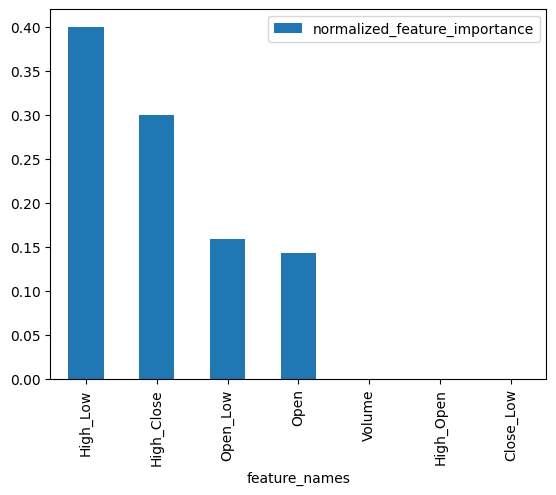

In [ ]:
feature_df.plot(x="feature_names",y="normalized_feature_importance",kind="bar")

In [ ]:
model.decision_path(x_test.iloc[0:1,]).todense()

matrix([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]])

[Text(0.5, 0.875, 'Open_Low <= -0.82\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(0.25, 0.625, 'High_Low <= -0.99\ngini = 0.49\nsamples = 12.9%\nvalue = [0.55, 0.45]'),
 Text(0.125, 0.375, 'High_Close <= -0.69\ngini = 0.4\nsamples = 0.5%\nvalue = [0.28, 0.72]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 0.2%\nvalue = [0.5, 0.5]'),
 Text(0.1875, 0.125, 'gini = 0.12\nsamples = 0.2%\nvalue = [0.07, 0.93]'),
 Text(0.375, 0.375, 'High_Low <= 0.13\ngini = 0.49\nsamples = 12.4%\nvalue = [0.56, 0.44]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 9.7%\nvalue = [0.54, 0.46]'),
 Text(0.4375, 0.125, 'gini = 0.45\nsamples = 2.7%\nvalue = [0.65, 0.35]'),
 Text(0.75, 0.625, 'Open <= -0.39\ngini = 0.5\nsamples = 87.1%\nvalue = [0.5, 0.5]'),
 Text(0.625, 0.375, 'High_Low <= -0.34\ngini = 0.5\nsamples = 49.7%\nvalue = [0.51, 0.49]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 18.6%\nvalue = [0.48, 0.52]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 31.1%\nvalue = [0.53, 0.47]'),
 Text

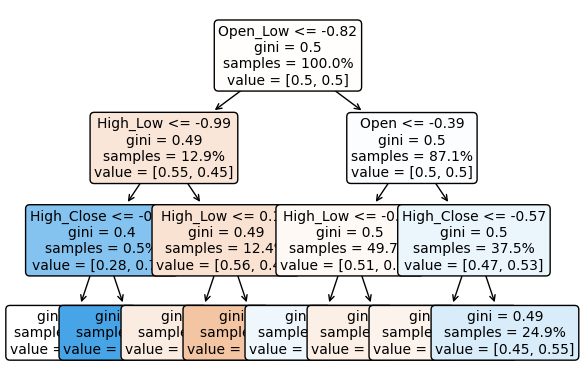

In [ ]:
plot_tree(model,feature_names=x_train.columns,fontsize=10,filled=True,rounded=True,proportion=True,precision=2)

In [ ]:
model.coef_,x_train.columns

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

In [ ]:
model.coef_,x_train.columns

In [ ]:
mean_absolute_error(y_train,train_predictions)   # 0.0001

In [ ]:
mean_absolute_error(y_test[:-1],test_preditions[:-1])

In [ ]:
mean_absolute_error(y_test[:-1],test_preditions[:-1])

In [ ]:
x_test_original["actual"] = y_test.values

In [ ]:
x_test_original["direction"] = x_test_original.apply(lambda x: 1 if x['pred'] * x['actual'] >= 0 else 0,axis=1)

KeyError: 'pred'

In [ ]:
x_test_original.direction.value_counts(1)

In [ ]:
x_test.shape

In [ ]:
x_test_original["product"] = x_test_original.apply(lambda x: abs(x['actual']) * x['Open'] if x['direction'] == 1 else -abs(x['actual']) * x['Open'] ,axis=1)

In [ ]:
x_test_original["product"].sum()

-57.38532915978263

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_test_original.index,x_test_original["direction"],c=x_test_original["direction"])
plt.xticks(rotation=90)
plt.show()


KeyError: 'direction'

In [ ]:
x_test